C:\Users\entropy\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\linalg\_linalg.py:2767: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
C:\Users\entropy\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\linalg\_isolve\iterative.py:406: RuntimeWarning: overflow encountered in dot
  rho_cur = dotprod(r, z)
C:\Users\entropy\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\linalg\_isolve\iterative.py:416: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rho_cur / dotprod(p, q)


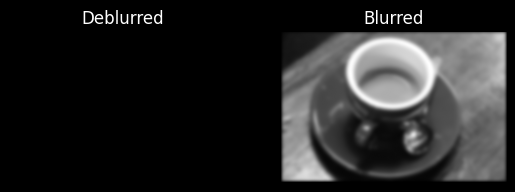

In [1]:
from skimage import data as testimages
from skimage.color import rgb2gray
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

img = getattr(testimages, "coffee")()
X = rgb2gray(img)

m, n = X.shape
def blur_matrix(d):
    data = [0.25 * (d - 1), 0.5 * d, 0.25 * (d - 1)]
    return sp.diags(data, [-1, 0, 1], shape=(d, d))

B = blur_matrix(m)
C = blur_matrix(n)
k = 50
blur = lambda X: sp.linalg.matrix_power(B, k) @ X @ sp.linalg.matrix_power(C, k)
Z = blur(X)

vec = lambda Z: Z.reshape(m * n)
unvec = lambda z: z.reshape(m, n)
xform = lambda x: vec(blur(unvec(x)))

T = sp.linalg.LinearOperator(((m * n), (m * n)), matvec=xform)
y, flag = sp.linalg.cg(T, vec(Z), rtol=1e-5, maxiter=50)
Y = unvec(np.maximum(0, np.minimum(1, y)))

plt.subplot(1, 2, 2),  plt.imshow(X, cmap="gray")
plt.axis("off"),  plt.title("Original")
plt.subplot(1, 2, 1),  plt.imshow(Y, cmap="gray")
plt.axis("off"),  plt.title("Deblurred");
plt.subplot(1, 2, 2),  plt.imshow(Z, cmap="gray")
plt.axis("off"),  plt.title("Blurred");


In [26]:
#8.7.5
import numpy as np
import scipy as sp

m = 50
data = [0.25 * np.ones(m - 1), 0.5 * np.ones(m), 0.25 * np.ones(m - 1)]
offset = [-1, 0, 1]
B = sp.sparse.diags(data, offset, shape=(m, m))
B_d = B.todense()

try:
    L = sp.linalg.cholesky(B_d, lower=True)
except np.linalg.LinAlgError:
    print("LinAlgError")

k_B = np.linalg.cond(B_d)
print(k_B)


1053.4789912001197


Text(0.5, 1.0, 'The graph of $x=f^{-1}(b)$')

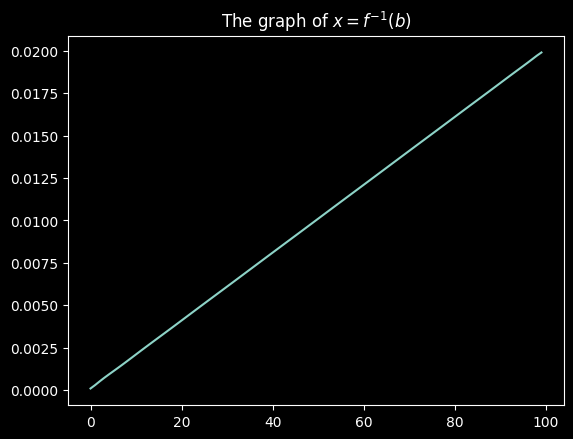

In [3]:
#8.7.6
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def cumsum(x):
    n = len(x)
    result = np.zeros(n)
    for i in range(n):
        for j in range(i + 1):
            result[i] += x[j]

    return result

b = [(i / 100)**2 for i in range(1, 101)]

T = sp.sparse.linalg.LinearOperator((100, 100), matvec=cumsum)
x, flag = sp.sparse.linalg.gmres(T, b, rtol=1e-5, maxiter=50)
plt.plot(x)
plt.title(r"The graph of $x=f^{-1}(b)$")